### 1.) Import and Read Data

In [237]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [253]:
xls = pd.ExcelFile('/Users/bradsilk/Desktop/Data Analysis Projects/Sales/US_Regional_Sales_Data ALTERED.xlsx')

df_orders = pd.read_excel(xls, 'Sales Orders Sheet')
df_cust = pd.read_excel(xls, 'Customers Sheet')
df_loc = pd.read_excel(xls, 'Store Locations Sheet')
df_prod = pd.read_excel(xls, 'Products Sheet')
df_region = pd.read_excel(xls, 'Regions Sheet')
df_team = pd.read_excel(xls, 'Sales Team Sheet')

---

### 2.) Understanding the Dataframes

In [244]:
#Determine row and column count of df_orders, the main dataframe we'll be working with:

df_orders.shape

(7988, 16)

In [1237]:
#Checking the columns present in df_orders:

df_orders.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost', 'Profit'],
      dtype='object')

In [245]:
#Checking the data types of df_orders:

df_orders.info()

#df_orders contains 4 object-type, 4 datatime-type, 1 int-type, & 7 float type columns
#A few of these column contain null values, which we will deal with shortly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7988 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7988 non-null   object        
 1   Sales Channel     7988 non-null   object        
 2   WarehouseCode     7978 non-null   object        
 3   ProcuredDate      7975 non-null   datetime64[ns]
 4   OrderDate         7978 non-null   datetime64[ns]
 5   ShipDate          7980 non-null   datetime64[ns]
 6   DeliveryDate      7980 non-null   datetime64[ns]
 7   CurrencyCode      7976 non-null   object        
 8   _SalesTeamID      7980 non-null   float64       
 9   _CustomerID       7977 non-null   float64       
 10  _StoreID          7979 non-null   float64       
 11  _ProductID        7984 non-null   float64       
 12  Order Quantity    7988 non-null   int64         
 13  Discount Applied  7950 non-null   float64       
 14  Unit Price        7917 n

In [246]:
#Show summary statistics:

df_orders.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7980.000000,7977.000000,7979.000000,7984.000000,7988.000000,7950.000000,7917.000000,7938.000000
mean,14.380201,25.453303,183.808748,23.766909,4.525663,0.114509,2284.185462,1430.998585
std,7.985829,14.413696,105.886461,13.526361,2.312500,0.085716,1672.921164,1112.183602
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,604.591250
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2039.865250
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000


In [247]:
#Summary statistics for the ID columns dont make sense, so let's exclude those:

df_orders[df_orders.columns.difference(['_SalesTeamID', '_CustomerID','_StoreID','_ProductID'])].describe()

,Discount Applied,Order Quantity,Unit Cost,Unit Price
count,7950.000000,7988.000000,7938.000000,7917.000000
mean,0.114509,4.525663,1430.998585,2284.185462
std,0.085716,2.312500,1112.183602,1672.921164
min,0.050000,1.000000,68.675000,167.500000
25%,0.050000,3.000000,604.591250,1031.800000
50%,0.075000,5.000000,1080.576000,1849.200000
75%,0.150000,7.000000,2039.865250,3611.300000
max,0.400000,8.000000,5498.556000,6566.000000


In [1238]:
#A quick check of the remaining dataframes:

df_cust.info()
df_cust.duplicated()
df_loc.info()
df_prod.info()
df_region.info()
df_team.info()

#There are no null values in any of these dataframes. They will be used as needed in later analyses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _CustomerID     50 non-null     int64 
 1   Customer Names  50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


AttributeError: 'DataFrame' object has no attribute 'duplicate'

---

### 3.) Data Cleaning

In [254]:
#Determining percent of missing values in each column:

for col in df_orders.columns:
    pct_missing = np.mean(df_orders[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    
#A small amount of data is missing form 14/16 columns 

OrderNumber - 0.0%
Sales Channel - 0.0017519709673382556%
WarehouseCode - 0.0015016894005756476%
ProcuredDate - 0.0016268301839569516%
OrderDate - 0.0012514078338130396%
ShipDate - 0.0010011262670504317%
DeliveryDate - 0.0010011262670504317%
CurrencyCode - 0.0015016894005756476%
_SalesTeamID - 0.0010011262670504317%
_CustomerID - 0.0013765486171943436%
_StoreID - 0.0011262670504317356%
_ProductID - 0.0005005631335252158%
Order Quantity - 0.0%
Discount Applied - 0.0047553497684895505%
Unit Price - 0.008884995620072582%
Unit Cost - 0.006257039169065198%


In [69]:
#Handling missing values:
    #Choices: 
        #Drop the missing values
        #Fill in with mean (for numerical features)
        #Fill in with median (for numerical features w/ outliers)
        #Fill in with mode (for numerical features)
        
#Sales Channel - drop row containing missing val 
#WarehouseCode - drop row containing missing val 
#OrderDate - drop row containing missing val
#ProcuredDate - drop row containing missing val
#ShipDate - drop row containing missing val 
#DeliveryDate - drop row containing missing val 
#_SalesTeamID - drop row containing missing val
#_CustomerID - drop row containing missing val
#_StoreID - drop row containing missing val
#_ProductID - drop row containing missing val
#Discount Applied - Fill in with mean value, median if dist is skewed
#Unit Price - Fill in with mean value, median if dist is skewed
#Unit Cost - Fill in with mean value, median if dist is skewed

In [256]:
#Dropping rows:

df_orders = df_orders.dropna(subset=['Sales Channel'])
df_orders = df_orders.dropna(subset=['ProcuredDate'])
df_orders = df_orders.dropna(subset=['OrderDate'])
df_orders = df_orders.dropna(subset=['OrderDate'])
df_orders = df_orders.dropna(subset=['ShipDate'])
df_orders = df_orders.dropna(subset=['DeliveryDate'])
df_orders = df_orders.dropna(subset=['_SalesTeamID'])
df_orders = df_orders.dropna(subset=['_CustomerID'])
df_orders = df_orders.dropna(subset=['_StoreID'])
df_orders = df_orders.dropna(subset=['_ProductID'])
df_orders.shape

#55 Rows dropped

(7933, 16)

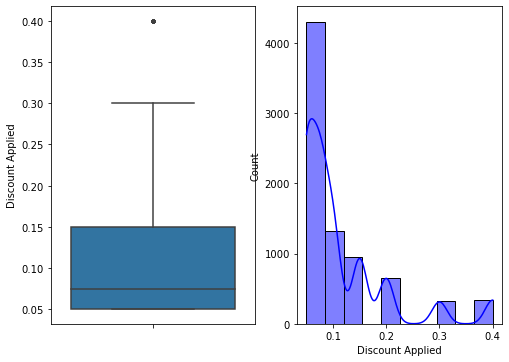

In [297]:
#Filling in missing values (Discount Applied, Unit Price, Unit Cost) - Checking for outliers

#Discount Applied: Outlier and positive skew; use median

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(7,5))
plt.tight_layout()

sns.boxplot(data=df_orders,y='Discount Applied', 
                ax=axes[0],fliersize=3)
sns.histplot(data=df_orders,x='Discount Applied',bins=10,color='blue',
            edgecolor='black', kde = True,
            ax=axes[1]);

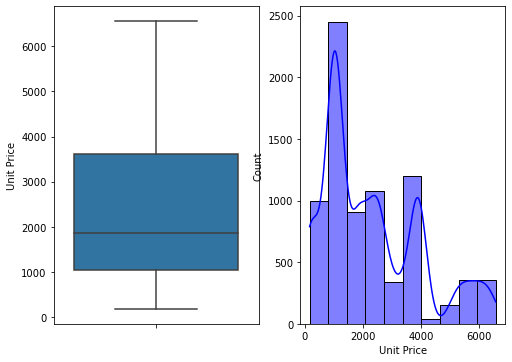

In [296]:
#Unit Price: Multiple outliers and positive skew; use median

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(7,5))
plt.tight_layout()

sns.boxplot(data=df_orders,y='Unit Price', 
                ax=axes[0],fliersize=1.25)
sns.histplot(data=df_orders,x='Unit Price',bins=10,color='blue',
            edgecolor='black', kde = True,
            ax=axes[1]);



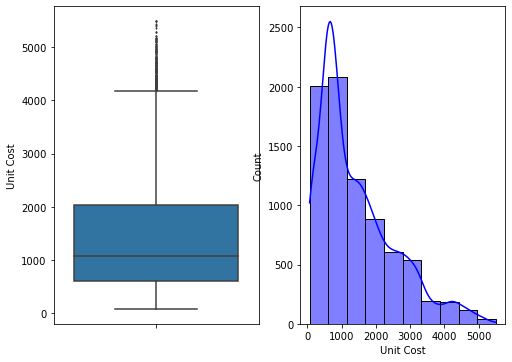

In [295]:
#Unit Cost: Multiple outliers and positive skew; use median

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(7,5))
plt.tight_layout()

sns.boxplot(data=df_orders,y='Unit Cost', 
                ax=axes[0],fliersize=1.25)
sns.histplot(data=df_orders,x='Unit Cost',bins=10,color='blue',
            edgecolor='black', kde = True,
            ax=axes[1]);



In [209]:
#Replacement with median:

df_orders['Unit Cost'].fillna((df_orders['Unit Cost'].median()), 
                              inplace=True)

df_orders['Unit Price'].fillna((df_orders['Unit Price'].median()), 
                              inplace=True)

df_orders['Discount Applied'].fillna((df_orders['Discount Applied'].median()), 
                              inplace=True)
df_orders.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [236]:
#Check for duplicate data:

duplicate = df_orders.duplicated()
print(duplicate.sum())
df_orders[duplicate]

#None found

0


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost


---

### 4.) Univariate Analysis